In [1]:
!pip install easyocr
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract


!pip uninstall opencv-python-headless -y
!pip install opencv-python-headless==4.1.2.30
 # restart runtime


     |████████████████████████████████| 3.0 MB 28.9 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Successfully uninstalled opencv-python-headless-4.5.5.64
     |████████████████████████████████| 21.8 MB 1.3 MB/s 


In [ ]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform

import easyocr

In [15]:
import pytesseract
from pytesseract import Output

## Resize the image and set aspect ratio

In [9]:
url = "img_vernier/626519.jpg"
url ="https://raw.githubusercontent.com/Tuchsanai/Meter_Reader/main/Digital01/img_vernier/626519.jpg"
img = io.imread(url)




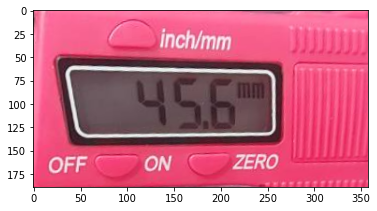

In [10]:
def find_Plastic_module_withColor_MAPPING(img):

    # define range of blue color in HSV
    low_red = np.array([168, 100, 220], dtype=np.uint8)
    high_red = np.array([175, 240,255], dtype=np.uint8)

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Threshold the HSV image to get only blue colors
    maskb = cv2.inRange(hsv, low_red, high_red)


    contour,hierarchy = cv2.findContours(maskb,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contour           = sorted(contour, key=cv2.contourArea, reverse=True)

    for c in  contour:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.05 * peri, True)
        if len(approx) == 4:
             four_points = np.squeeze(approx)
             imgx        = four_point_transform(img,four_points)
             return imgx
         
    return None




img2 = find_Plastic_module_withColor_MAPPING(img)

plt.imshow(img2)

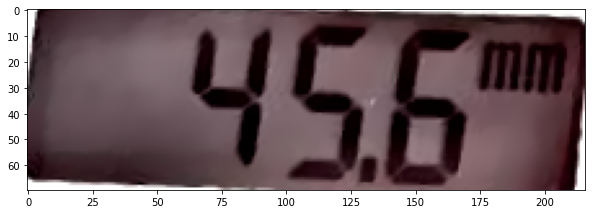

In [11]:
def FindLCD(img ,threshold = 180):
    # Grayscale and Canny Edges extracted
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    ret,th = cv2.threshold(blur,threshold,255,0)

    #plt.imshow(th)

    contour,hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contour          = sorted(contour, key=cv2.contourArea, reverse=True)
    for contour in contour:
        peri = cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,0.08*peri, True)
        
        if len(approx) == 4:
            four_points = np.squeeze(approx)
            imgx       = four_point_transform(img,four_points)
            imgx       = cv2.detailEnhance(imgx,sigma_s =25 , sigma_r = 0.3)
            imgx = cv2.bilateralFilter(imgx, 9, 27, 27)
            return imgx

    return None


lcd_img=FindLCD(img2)



plt.figure(figsize=(10,10))
plt.imshow(lcd_img)

In [6]:

reader = easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [12]:
bounds = reader.readtext( lcd_img )
bounds

[([[54, 0], [180, 0], [180, 70], [54, 70]], '456', 0.999198019366387)]

In [16]:
d = pytesseract.image_to_string( lcd_img  )
d

'\x0c'

In [ ]:
print(d)

In [ ]:
!pip install easyocr

In [ ]:
bounds = reader.readtext( lcd_img )
bounds

In [ ]:
bounds[0][1]